### 5.1 FFT Sample

In [1]:
import numpy as np
from numpy.fft import fft, ifft

x = np.array( [ 1, 2, 4, 4 ] )
X = fft( x )
xx = ifft ( X )

print( "x =", x )
print( "X =", X )
print( "Inverse FFT of X =", xx )

x = np.array( [ 1, 2, 4, 4 ] )
X = fft( x )
X[3]=0
xx = ifft ( X )

print( "x =", x )
print( "X =", X )
print( "Inverse FFT of X =", xx )

x = [1 2 4 4]
X = [11.+0.j -3.+2.j -1.+0.j -3.-2.j]
Inverse FFT of X = [1.+0.j 2.+0.j 4.+0.j 4.+0.j]
x = [1 2 4 4]
X = [11.+0.j -3.+2.j -1.+0.j  0.+0.j]
Inverse FFT of X = [1.75+0.5j  2.5 -0.75j 3.25-0.5j  3.5 +0.75j]


### 5.2 Fourier Spectrum

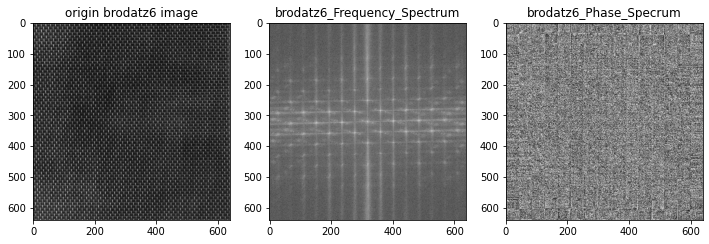

In [2]:
import numpy as np
import cv2
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt

def spectrum( f ):
    F = fft2( f )
    Fshift = fftshift( F )
    mag = 20 * np.log( np.abs( Fshift ) + 1 )
    mag = mag / mag.max( ) * 255.0
    g = np.uint8( mag )
    return g

def phase_spectrum( f ):
    F = fft2( f )
    phase = np.angle( F, deg = True )
    nr, nc = phase.shape[:2]
    for x in range( nr ):
        for y in range( nc ):
            if phase[x,y] < 0:
                phase[x,y] = phase[x,y] + 360
            phase[x,y] = int( phase[x,y] * 255 / 360 )
    g = np.uint8( np.clip( phase, 0, 255 ) )
    return g
    
def main( ):
    img = cv2.imread( "brodatz6.bmp", -1 )
    magnitude = spectrum( img )
    phase = phase_spectrum( img )
    plt.figure(figsize=(12, 12))
    plt.subplot(1,3,1)   
    plt.title('origin brodatz6 image') 
    plt.imshow(img,cmap=plt.cm.gray)
    plt.subplot(1,3,2)     
    plt.title('brodatz6_Frequency_Spectrum') 
    plt.imshow(magnitude,cmap=plt.cm.gray)
    plt.subplot(1,3,3)     
    plt.title('brodatz6_Phase_Specrum') 
    plt.imshow(phase,cmap=plt.cm.gray)

main( )

### 5.3 Fourier Ideal highpass filter

Please enter cutoff frequency for ideal highpass filter: 20


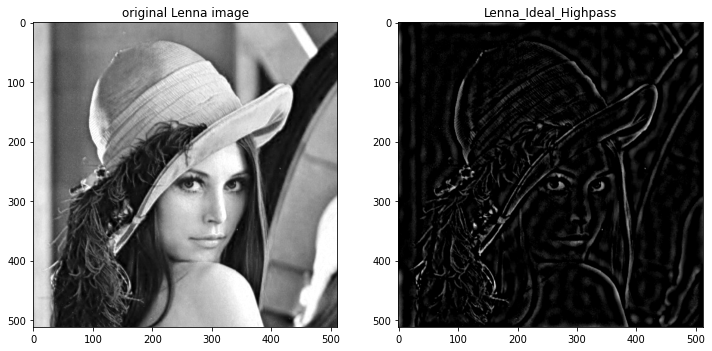

In [24]:
import numpy as np
import cv2
from numpy.fft import fft2, ifft2
import matplotlib.pyplot as plt

def frequency_ideal_highpass( f , D0):
    nr, nc = f.shape[:2]

    fp = np.zeros( [ nr, nc ] ) # Pre-processing
    for x in range( nr ):
        for y in range( nc ):
            fp[x,y] = pow( -1, x + y ) * f[x,y]
            # (-1)^(x+y): 移動到變換中心

    F = fft2( fp ) # Discrete-Fourier Transform
    G = F.copy( )

    # Ideal High-pass filter
    for u in range( nr ):
        for v in range( nc ):
            # dist = np.sqrt( ( u - nr / 2 ) * ( u - nr / 2 ) + ( v - nc / 2 ) * ( v - nc / 2 ) ) # distance
            # center of y = nr / 2, center of x = nc / 2
            dist = np.sqrt(pow(u - (nr / 2), 2) + pow(v - (nc / 2), 2))
            if dist <= D0:
                G[u,v] = 0
    # H(u, v) is a filter, and it attenuates or selects frequencies
    # H(u, v) = 0, if (u, v) <= 0 (distance <= 0)
    # H(u, v) = 1, otherwise
                
    
    gp = ifft2( G ) # Inverse Discrete Fourier Transform

    gp2 = np.zeros( [ nr, nc ] ) # Post-processing
    for x in range( nr ):
        for y in range( nc ):
            gp2[x,y] = round( pow( -1, x + y ) * np.real( gp[x,y] ), 0 )
            # (-1)^(x+y): 反中心變換
    g = np.uint8( np.clip( gp2, 0, 255 ) )
    # normalization, [0, 255], uint8

    return g

def main( ):
    img = cv2.imread( "Lenna.bmp", -1 )
    cutoff = eval( input( "Please enter cutoff frequency for ideal highpass filter: " ) )
    img2 = frequency_ideal_highpass(img, cutoff)
    
    plt.figure(figsize=(12, 12))
    plt.subplot(1,2,1)   
    plt.title('original Lenna image') 
    plt.imshow(img,cmap=plt.cm.gray)    
    plt.subplot(1,2,2)   
    plt.title('Lenna_Ideal_Highpass') 
    plt.imshow(img2,cmap=plt.cm.gray)  
main( )

### <font color="Red">5.4 Please finish ideal lowpass filter by referencing the code given in 5.3


Please enter cutoff frequency for ideal lowpass filter: 20


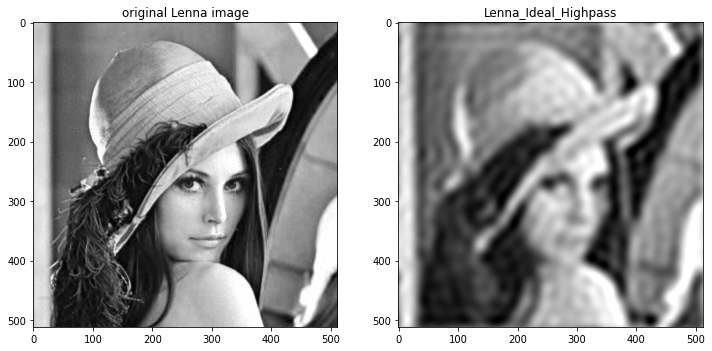

In [25]:
import numpy as np
import cv2
from numpy.fft import fft2, ifft2
import matplotlib.pyplot as plt

def frequency_ideal_lowpass( f , D0):
    nr, nc = f.shape[:2]

    fp = np.zeros( [ nr, nc ] ) # Pre-processing
    for x in range( nr ):
        for y in range( nc ):
            fp[x,y] = pow( -1, x + y ) * f[x,y]

    F = fft2( fp ) # Discrete-Fourier Transform
    G = F.copy( )

    # Ideal Low-pass filter
    # -------------- Code Here -------------
    for u in range( nr ):
        for v in range( nc ):
            dist = np.sqrt(pow(u - (nr / 2), 2) + pow(v - (nc / 2), 2))
            if dist > D0: #
                G[u,v] = 0    
    # H(u, v) = 1, if D(u, v) <= D0 (distance <= 0)
    # H(u, v) = 0, if D(u, v) > 0
    # D(u, v) is the distance from point (u, v) to the origin of the frequency plane
    # D(u, v) = (u^2 + v^2)^(1/2)
    # D0 is a non-negative quantity
    
    gp = ifft2( G ) # Inverse Discrete Fourier Transform

    gp2 = np.zeros( [ nr, nc ] ) # Post-processing
    for x in range( nr ):
        for y in range( nc ):
            gp2[x,y] = round( pow( -1, x + y ) * np.real( gp[x,y] ), 0 )
    g = np.uint8( np.clip( gp2, 0, 255 ) )

    return g

def main( ):
    img = cv2.imread( "Lenna.bmp", -1 )
    cutoff = eval( input( "Please enter cutoff frequency for ideal lowpass filter: " ) )
    img2 = frequency_ideal_lowpass(img, cutoff)
    
    plt.figure(figsize=(12, 12))
    plt.subplot(1,2,1)   
    plt.title('original Lenna image') 
    plt.imshow(img,cmap=plt.cm.gray)    
    plt.subplot(1,2,2)   
    plt.title('Lenna_Ideal_Highpass') 
    plt.imshow(img2,cmap=plt.cm.gray)  
main( )

### <font color="Red">5.5 Please finish the Gaussian lowpass filter and Butterworth lowpass filter: </font><p>
#### Gaussian low-pass filter：<p>
<img src="https://pic1.xuehuaimg.com/proxy/csdn/https://img-blog.csdnimg.cn/20200428112517808.png" width=300> <p>
#### Butterworth low-pass filter：  
<img src="https://pic1.xuehuaimg.com/proxy/csdn/https://img-blog.csdnimg.cn/20200428113540913.png" width=300>

Filtering in the Frequency Domain
(1) Gaussian Lowpass Filter
(2) Butterworth Lowpass Filter
Please enter your choice: 2
Please enter cutoff frequency for Butterworth Lowerpass filter: 10
Please enter order for Butterworth Lowerpass filter: 2


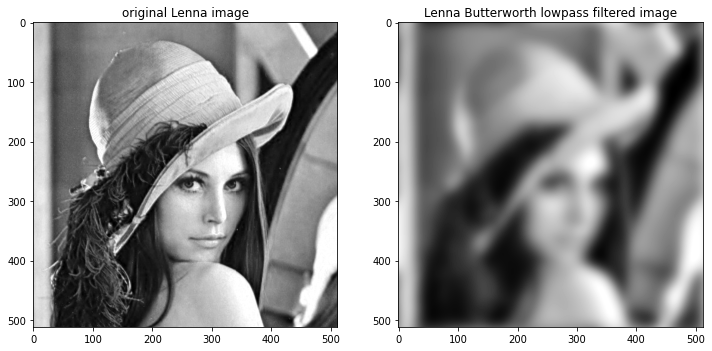

In [32]:
import numpy as np
import cv2
from numpy.fft import fft2, ifft2
import matplotlib.pyplot as plt

def frequency_Gaussian_lowpass( f, D0):
    nr, nc = f.shape[:2]

    fp = np.zeros( [ nr, nc ] ) # Pre-Processing
    for x in range( nr ):
        for y in range( nc ):
            fp[x,y] = pow( -1, x + y ) * f[x,y]

    F = fft2( fp ) # Discrete Fourier Transform
    H = F.copy( )
    
#------------------------- code here ------------------------------   
    for u in range( nr ):
        for v in range( nc ):
            dist = np.sqrt(pow(u - (nr / 2), 2) + pow(v - (nc / 2), 2))
            H[u,v] = H[u,v] * np.exp((-pow(dist, 2) / (2 * pow(D0, 2))))
            # G(u,v) = H(u, v) * F(u, v)
            # why we need adding H[u,v]? -> do convolution
    
    gp = ifft2( H ) # Inverse Discrete Fourier Transform
    
    gp2 = np.zeros( [ nr, nc ] ) # Post-Processing
    for x in range( nr ):
        for y in range( nc ):
            gp2[x,y] = round( pow( -1, x + y ) * np.real( gp[x,y] ), 0 )
    g = np.uint8( np.clip( gp2, 0, 255 ) )

    return g

def frequency_Butterworth_lowpass( f, D0, order ):
    nr, nc = f.shape[:2]

    fp = np.zeros( [ nr, nc ] ) # Pre-Processing
    for x in range( nr ):
        for y in range( nc ):
            fp[x,y] = pow( -1, x + y ) * f[x,y]

    F = fft2( fp ) # Discrete Fourier Transform
    H = F.copy( )
    
#------------------------- code here ------------------------------    
    for u in range( nr ):
        for v in range( nc ):
            dist = np.sqrt(pow(u - (nr / 2), 2) + pow(v - (nc / 2), 2))
            H[u,v] = H[u,v] * (1 / (1 + pow(dist / D0, 2*order))) 
            # G(u,v) = H(u, v) * F(u, v)
            # why we need adding H[u,v]? -> do convolution
        
    gp = ifft2( H ) # Inverse Discrete Fourier Transform

    gp2 = np.zeros( [ nr, nc ] ) # Post-Processing
    for x in range( nr ):
        for y in range( nc ):
            gp2[x,y] = round( pow( -1, x + y ) * np.real( gp[x,y] ), 0 )
    
    g = np.uint8( np.clip( gp2, 0, 255 ) )

    return g
            


def main( ):
    img = cv2.imread( "Lenna.bmp", -1 )
    print( "Filtering in the Frequency Domain" )
    print( "(1) Gaussian Lowpass Filter" )
    print( "(2) Butterworth Lowpass Filter" )
    filter = eval( input( "Please enter your choice: " ) )
    if filter == 1:
        cutoff = eval( input( "Please enter cutoff frequency for Gaussian Lowerpass filter: " ) )
        img2 = frequency_Gaussian_lowpass( img, cutoff)
    elif filter == 2:
        cutoff = eval( input( "Please enter cutoff frequency for Butterworth Lowerpass filter: " ) )
        order = eval( input( "Please enter order for Butterworth Lowerpass filter: " ) )
        img2 = frequency_Butterworth_lowpass( img, cutoff, order)        
    
    plt.figure(figsize=(12, 12))
    plt.subplot(1,2,1)   
    plt.title('original Lenna image') 
    plt.imshow(img,cmap=plt.cm.gray) 
    if filter == 1:
        plt.subplot(1,2,2)   
        plt.title('Lenna Gaussiand lowpass filtered image') 
        plt.imshow(img2,cmap=plt.cm.gray)  
    elif filter == 2:
        plt.subplot(1,2,2)   
        plt.title('Lenna Butterworth lowpass filtered image') 
        plt.imshow(img2,cmap=plt.cm.gray)
main( )

# <font color="Red">5.6 Notch Filter
#### <font color="Red"> Please find appropriate notch filter to separate the given image to two images with horizontal and vertical information individually.

640 640


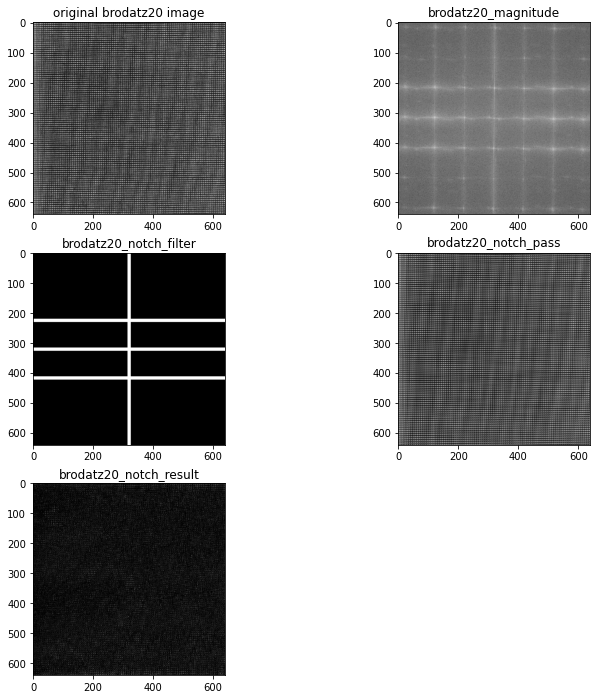

In [124]:
import numpy as np
import cv2
from numpy.fft import fft2, fftshift, ifftshift, ifft2
import matplotlib.pyplot as plt
      

def notch_filter_generation2(nr,nc,row_range, center_range):
    notch = 0*np.ones([nr,nc],dtype='uint8')
    
    notch = cv2.line(notch, (0, nr//2), (nc, nr//2), (255, 255, 255), row_range)
    notch = cv2.line(notch, (nc//2, 0), (nc//2, nr), (255, 255, 255), row_range)
    
    notch = cv2.line(notch, (0, (nr//2)+center_range), (nc, (nr//2)+center_range), (255, 255, 255), row_range)
    notch = cv2.line(notch, (0, (nr//2)-center_range), (nc, (nr//2)-center_range), (255, 255, 255), row_range)

    
    return notch 

def notch_filtering(f, notch, type):
    # type = 1: forward filter，type = 0: inverse filter
    nr, nc = f.shape[:2]

    fp = np.zeros( [ nr, nc ] ) # Pre-Processing
    for x in range( nr ):
        for y in range( nc ):
            fp[x,y] = pow( -1, x + y ) * f[x,y]

    F = fft2( fp ) # Discrete Fourier Transform
    G = F.copy( )
    nc2 = nc /2
    range_nc = 5

 # notch filtering
    for u in range( nr ):
        for v in range( nc ):
            if type == 1:
                G[u,v] *= notch[u,v]/255  
            else:
                G[u,v] *= (1-notch[u,v]/255)    

    gp = ifft2( G ) # Inverse Discrete Fourier Transform

    gp2 = np.zeros( [ nr, nc ] ) # Post-Processing
    for x in range( nr ):
        for y in range( nc ):
            gp2[x,y] = round( pow( -1, x + y ) * np.real( gp[x,y] ), 0 )
    g = np.uint8( np.clip( gp2, 0, 255 ) )

    return g

def spectrum( f ):
    F = fft2( f )
    Fshift = fftshift( F )
    mag = 20 * np.log( np.abs( Fshift ) + 1 )
    mag = mag / mag.max( ) * 255.0
    g = np.uint8( mag )
    return g

def main( ):
    img = cv2.imread( "brodatz20.bmp", -1 )
    magnitude = spectrum( img )
    
    nr, nc = img.shape[:2]
    print(nr, nc)
    '''
    blank = np.zeros([nr,nc],dtype='uint8')
    thresh = cv2.threshold(magnitude, 144, 255, cv2.THRESH_BINARY)[1]

    cnts,_ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for c in cnts:
        area = cv2.contourArea(c)
        if area > 50:
            cv2.drawContours(blank, [c], -1, (255,255,255), -1)
    lines = cv2.HoughLinesP(blank, 1.0, np.pi/180, 100, minLineLength=320, maxLineGap=32)
    
    cvline = np.zeros([nr,nc],dtype='uint8')
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(cvline, (x1, y1), (x2, y2), (255,255,255), 1)
    '''

    row_range = 10
    center_range = 96
    notch_filter = notch_filter_generation2(nr,nc,row_range, center_range)
    img2 = notch_filtering( img ,notch_filter,1)
    img3 = notch_filtering( img ,notch_filter,0)
    
    plt.figure(figsize=(12, 12))
    plt.subplot(3,2,1)   
    plt.title('original brodatz20 image') 
    plt.imshow(img,cmap=plt.cm.gray)    
    plt.subplot(3,2,2)   
    plt.title('brodatz20_magnitude') 
    plt.imshow(magnitude,cmap=plt.cm.gray)  
    plt.subplot(3,2,3)   
    plt.title('brodatz20_notch_filter') 
    plt.imshow(notch_filter,cmap=plt.cm.gray)  
    plt.subplot(3,2,4)   
    plt.title('brodatz20_notch_pass') 
    plt.imshow(img2,cmap=plt.cm.gray)    
    plt.subplot(3,2,5)   
    plt.title('brodatz20_notch_result') 
    plt.imshow(img3,cmap=plt.cm.gray) 
    '''
    plt.subplot(3,2,6)   
    plt.title('line_image') 
    plt.imshow(cvline,cmap=plt.cm.gray) 
    '''
    
main( )